In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

/Users/danielflat/Documents/Privat/Project_RL/venv/lib/python3.11/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/danielflat/Documents/Privat/Project_RL/venv/lib/python3.11/site-packages/gymnasium/envs/registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from '/Users/danielflat/Documents/Privat/Project_RL/hockey/hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [7]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [8]:
info, env.get_info_agent_two()

({'winner': -1,
  'reward_closeness_to_puck': -0.15396091950384136,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.00320989990234375},
 {'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.00320989990234375})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [13]:
env.close()

# Train Shooting

In [19]:
env = h_env.HockeyEnv(mode=1)  # TRAIN_SHOOTING

In [18]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [12]:
env.close()

# Train DEFENDING

In [20]:
env = h_env.HockeyEnv(mode=2)   # TRAIN_DEFENSE

In [21]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

-0.47105009680988763
-0.29723108748010735
-0.1575103988368286
-0.04576663126274186
0.0
0.0
0.0
0.0
0.0
-0.45340200487877064
-0.45145668629413516
-0.44915195417043163
-0.44652630221741607
-0.4436121592332132
-0.4404385722562155
-0.43703196900067887
-0.4334160632902243
-0.42961183665852165
-0.4256391563207304
-0.42151480707748334
-0.41725467131620686
-0.41287273484979053
-0.2564363037775204
-0.11676385270327444
-0.13391051495816012
-0.22734588312064227
-0.3145261392251248
-10.40491209818383


In [22]:
env.close()

# Using discrete actions

In [23]:
import random

In [26]:
env = h_env.HockeyEnv(mode=1)  #TRAIN_SHOOTING

In [27]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [28]:
env.close()

# Hand-crafted Opponent

In [29]:
env = h_env.HockeyEnv()

In [30]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [31]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [32]:
np.mean(obs_buffer,axis=0)

array([-2.54319966, -0.1579866 ,  0.19454388, -0.60530778,  0.08380972,
       -1.22579903,  1.58357112,  0.03693727,  0.13720211, -0.33823996,
        0.61311662,  0.0550026 ,  0.32991937,  0.79210185,  9.13301146,
        0.78829473,  3.        ,  0.        ])

In [33]:
np.std(obs_buffer,axis=0)

array([ 0.62222394,  0.08422381,  0.55576203,  5.35692534,  1.63101177,
        3.8675995 ,  0.81600507,  0.16876128,  0.05954099,  7.68789231,
        1.004798  ,  0.64818539,  2.21580274,  1.1995608 , 11.07420935,
       13.72444761,  4.98569382,  0.        ])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [39]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [40]:
import matplotlib.pyplot as plt # df: Changed from pylab, since its usage is deprecated 

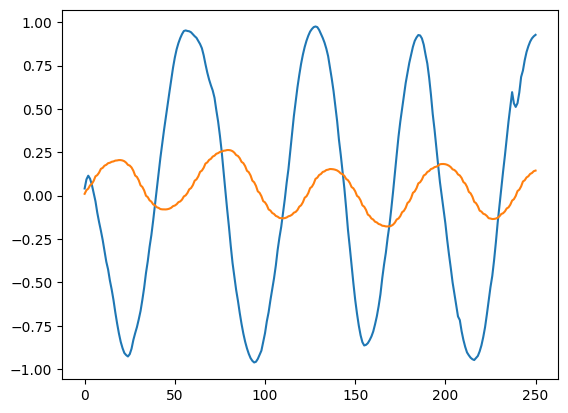

In [41]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

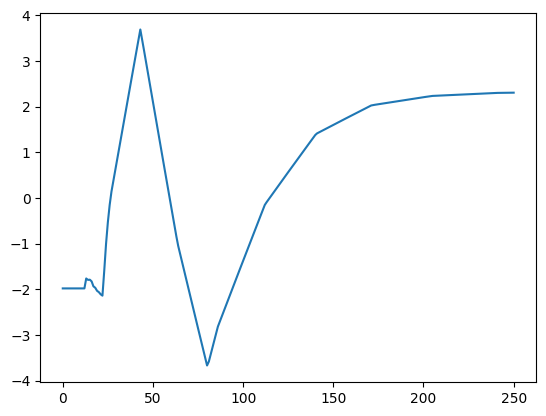

In [42]:
plt.plot(obs_buffer[:,12])

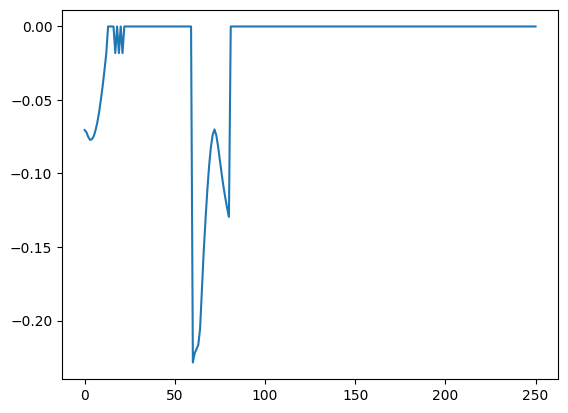

In [43]:
plt.plot(reward_buffer[:])

In [44]:
np.sum(reward_buffer)

np.float64(-3.6491034699305747)

In [45]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

({'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 4.4259685277938845e-06},
 {'winner': 0,
  'reward_closeness_to_puck': -0.09182353764873724,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -4.4259685277938845e-06},
 0.0,
 -0.09182353764873724)

In [46]:
env.close()

# Human Opponent

In [47]:
env = h_env.HockeyEnv()

In [48]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [49]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [50]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [51]:
env.close()

# Check side consistency

In [4]:
env = h_env.HockeyEnv()

In [5]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [6]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [7]:
obs_buffer.shape

(152580, 18)

In [8]:
np.mean(obs_buffer,axis=0)

array([-2.96779205e+00, -4.50762653e-03, -1.29439623e-03, -5.04526433e-02,
        2.97136895e-03,  4.10603189e-03,  2.95981442e+00,  5.49933173e-03,
        1.21846041e-03,  5.56287117e-02, -1.09909618e-02, -2.26394599e-04,
       -1.51281453e-02,  3.87068761e-04,  3.75492349e-02,  1.23124986e-02,
        1.09418010e+00,  1.08454581e+00])

In [9]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

array([-0.01303103, -0.00826166, -0.000676  , -0.00075088,  0.00702332,
        0.00368817,  0.01286341,  0.00819397,  0.00067554,  0.00075032,
       -0.007073  , -0.00370183,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00394178, -0.00395738])

In [10]:
winner_buffer

[0,
 -1,
 1,
 -1,
 0,
 0,
 1,
 -1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 0,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 -1,
 1,
 0,
 0,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 0,
 1,
 -1,
 0,
 0,
 -1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 1,
 0,
 0,
 1,
 1,
 -1,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 1,
 -1,
 0,
 -1,
 0,
 1,
 -

In [11]:
np.mean(winner_buffer,axis=0)

np.float64(0.034)

In [12]:
np.std(winner_buffer,axis=0)

np.float64(0.7980250622630846)

In [13]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(-4015.8606031565673), np.float64(-4646.1090535089215))

In [14]:
env.close()